In [1]:
%matplotlib inline
import numpy as np
import imageio

import matplotlib.pyplot as plt

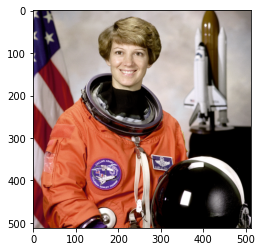

In [2]:
astronaut = imageio.imread('imageio:astronaut.png')[:,:,:3]
plt.imshow(astronaut)

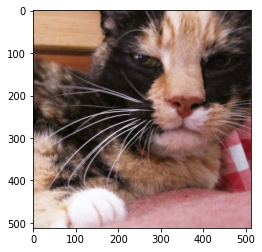

In [3]:
wikkie = imageio.imread('imageio:wikkie.png')[:,:,:3]
plt.imshow(wikkie)

# Espacio RGB

## Sumas

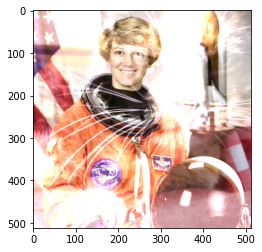

In [4]:
# Clampeada

def rgb_clamp_addition(img1, img2):
    addition = img1.astype(int)+ img2.astype(int)
    return np.clip(addition, 0, 255)

clamp_add = rgb_clamp_addition(astronaut, wikkie)

plt.imshow(clamp_add)

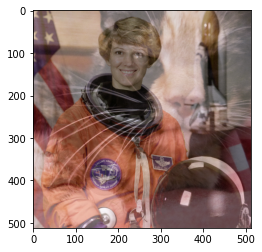

In [5]:
# Promediada

def rgb_avg_addition(img1, img2):
    addition = (img1.astype(int)+ img2.astype(int))/2
    return np.clip(addition.astype(int), 0, 255)

avg_add = rgb_avg_addition(astronaut,wikkie)
plt.imshow(avg_add)

## Restas

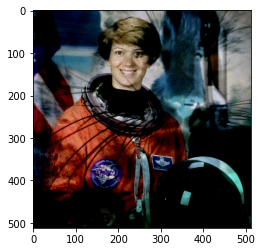

In [6]:
# Clampeada

def rgb_clamp_subtraction(img1, img2):
    addition = img1.astype(int)- img2.astype(int)
    return np.clip(addition, 0, 255)

clamp_sub = rgb_clamp_subtraction(astronaut, wikkie)

plt.imshow(clamp_sub)

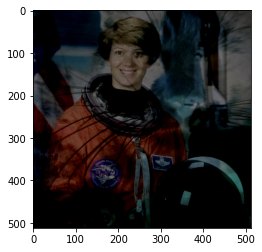

In [7]:
# Promediada

def rgb_avg_subtraction(img1, img2):
    addition = (img1.astype(int)- img2.astype(int))/2
    return np.clip(addition.astype(int), 0, 255)

avg_sub = rgb_avg_subtraction(astronaut,wikkie)
plt.imshow(avg_sub)

# Espacio YIQ

## Suma

In [8]:
from image_manip import rgb_to_yiq, yiq_to_rgb, map_pixels

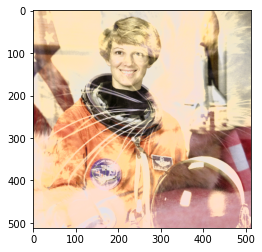

In [9]:
# Suma clampeada
def yiq_clamp_add(img1, img2):
    # Convert to yiq
    img1_yiq = rgb_to_yiq(img1)
    img2_yiq = rgb_to_yiq(img2)
    
    def generate_new_yiq(p1, p2):
        y1, i1, q1 = p1
        y2, i2, q2 = p2
        
        # Suma clampeada
        y3 = np.clip(y1 + y2, 0,1)
        
        # Interpolación
        i3 = (y1 * i1 + y2 * i2)/(y1 + y2)
        q3 = (y1 * q1 + y2 * q2)/(y1 + y2)
        
        return [y3, i3, q3]
    
    img3_yiq = np.array([generate_new_yiq(p1,p2) for p1, p2 in zip(img1_yiq.reshape((-1, 3)), img2_yiq.reshape((-1, 3)))]).reshape(img1.shape)
    
    return yiq_to_rgb(img3_yiq)

yiq_add = yiq_clamp_add(astronaut, wikkie)
plt.imshow(yiq_add)

## Resta

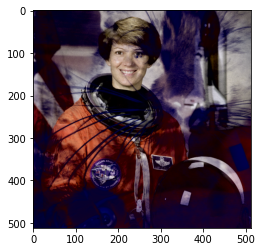

In [10]:
# Suma clampeada
def yiq_clamp_sub(img1, img2):
    # Convert to yiq
    img1_yiq = rgb_to_yiq(img1)
    img2_yiq = rgb_to_yiq(img2)
    
    def generate_new_yiq(p1, p2):
        y1, i1, q1 = p1
        y2, i2, q2 = p2
        
        # Suma clampeada
        y3 = np.clip(y1 - y2, 0,1)
        
        # Interpolación
        i3 = (y1 * i1 + y2 * i2)/(y1 + y2)
        q3 = (y1 * q1 + y2 * q2)/(y1 + y2)
        
        return [y3, i3, q3]
    
    img3_yiq = np.array([generate_new_yiq(p1,p2) for p1, p2 in zip(img1_yiq.reshape((-1, 3)), img2_yiq.reshape((-1, 3)))]).reshape(img1.shape)
    
    return yiq_to_rgb(img3_yiq)

yiq_sub = yiq_clamp_sub(astronaut, wikkie)
plt.imshow(yiq_sub)

## If-lighter

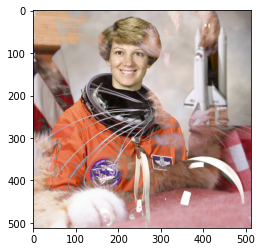

In [13]:
# If lighter
def if_lighter(img1, img2):
    # Convert to yiq
    img1_yiq = rgb_to_yiq(img1)
    img2_yiq = rgb_to_yiq(img2)
    
    def generate_if_lighter(p1, p2):
        y1, _, _ = p1
        y2, _, _ = p2
        
        if y1 > y2:
            return p1
        else:
            return p2
    
    img3_yiq = np.array([generate_if_lighter(p1,p2) for p1, p2 in zip(img1_yiq.reshape((-1, 3)), img2_yiq.reshape((-1, 3)))]).reshape(img1.shape)
    
    return yiq_to_rgb(img3_yiq)

yiq_if_lighter = if_lighter(astronaut, wikkie)
plt.imshow(yiq_if_lighter)

## If-darker

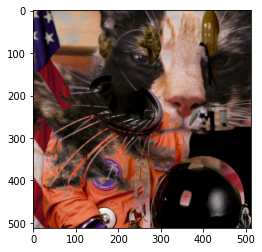

In [15]:
# If lighter
def if_darker(img1, img2):
    # Convert to yiq
    img1_yiq = rgb_to_yiq(img1)
    img2_yiq = rgb_to_yiq(img2)
    
    def generate_if_lighter(p1, p2):
        y1, _, _ = p1
        y2, _, _ = p2
        
        if y1 < y2:
            return p1
        else:
            return p2
    
    img3_yiq = np.array([generate_if_lighter(p1,p2) for p1, p2 in zip(img1_yiq.reshape((-1, 3)), img2_yiq.reshape((-1, 3)))]).reshape(img1.shape)
    
    return yiq_to_rgb(img3_yiq)

yiq_if_darker = if_darker(astronaut, wikkie)
plt.imshow(yiq_if_darker)